In [1]:
import torch
from sklearn.metrics import r2_score, mean_squared_error
from utils.fnn import fnn
import pickle

import numpy as np

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sys

sys.path.append("../../")
from _plotly_templates.custom_template import custom_template

pio.templates.default = custom_template
pio.renderers.default = "png"

In [ ]:
# models show acceptable performance
# as expected train score is better than test score
# by removing worst 5% from test set, test score is much closer (outliers seem to play important role)
# our averaging procedure should help mitigate the effects of slight over-fitting that may occur in the individual models
# a more thorough search for hyperparameters could probably further improve model performance
# (however, this is not the focus of this project, as it would have little effect on the main features and their explanation)

In [24]:
date = "2023-04-03"

In [3]:
def get_mse(date, change, period, config):
    mse_train = []
    mse_test = []
    for i in range(6):
        model = fnn(config)
        model.load_state_dict(torch.load(f"../model_data/{date}/{change}-{period}-{i}/model.pkl"))

        model.eval()

        with open(f"../model_data/{date}/{change}-{period}-{i}/X_train.pkl", 'rb') as f:
            X_train = pickle.load(f)
        with open(f"../model_data/{date}/{change}-{period}-{i}/y_train.pkl", 'rb') as f:
            y_train = pickle.load(f)
        y_hat = model(torch.tensor(X_train, dtype=torch.float32))
        y_hat = y_hat.detach().numpy()
        mse_train.append((y_train -  y_hat ) ** 2)
        # mse_train.append(mean_squared_error(y_train, y_hat))

        with open(f"../model_data/{date}/{change}-{period}-{i}/X_test.pkl", 'rb') as f:
            X_test = pickle.load(f)

        with open(f"../model_data/{date}/{change}-{period}-{i}/y_test.pkl", 'rb') as f:
            y_test = pickle.load(f)
        y_hat = model(torch.tensor(X_test, dtype=torch.float32))
        y_hat = y_hat.detach().numpy()
        mse_test.append((y_test - y_hat) ** 2)
        # mse_test.append(mean_squared_error(y_test, y_hat))
    
    return mse_train, mse_test

In [4]:
config = {
    "input_size": 13,
    "l1_size": 32,
    "l2_size": 16,
    "output_size": 1,
    "learning_rate": 0.001,
    "do": 0.2,
}

mse_train, mse_test = get_mse(date, 'afrr', 'before', config)

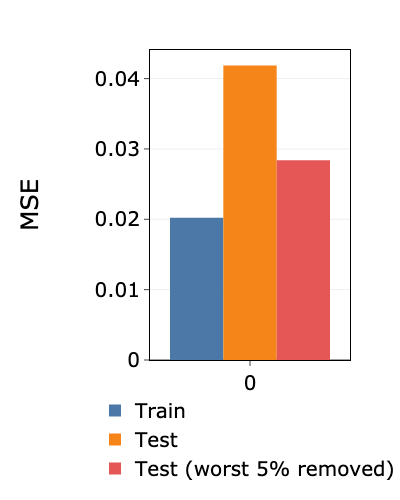

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)


In [13]:
config = {
    "input_size": 13,
    "l1_size": 32,
    "l2_size": 16,
    "output_size": 1,
    "learning_rate": 0.001,
    "do": 0.2,
}

mse_train, mse_test = get_mse(date, 'afrr', 'after', config)

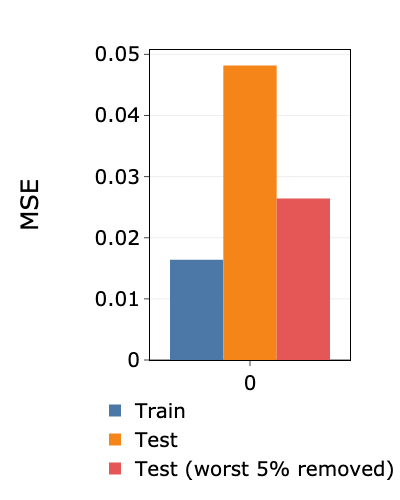

In [14]:
fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)


In [15]:
config = {
    "input_size": 7,
    "l1_size": 16,
    "l2_size": 8,
    "output_size": 1,
    "learning_rate": 0.001,
    "do": 0.2,
}

mse_train, mse_test = get_mse(date, 'bzs', 'before', config)

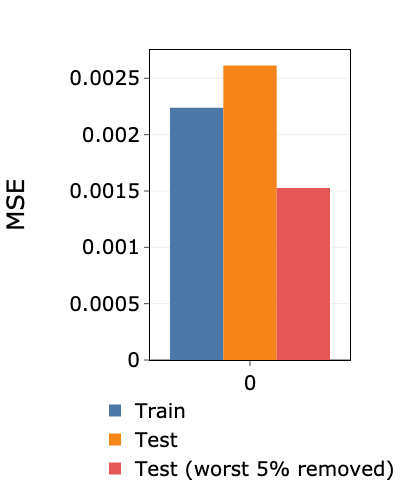

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)


In [17]:
config = {
    "input_size": 7,
    "l1_size": 16,
    "l2_size": 8,
    "output_size": 1,
    "learning_rate": 0.001,
    "do": 0.2,
}

mse_train, mse_test = get_mse(date, 'bzs', 'after', config)

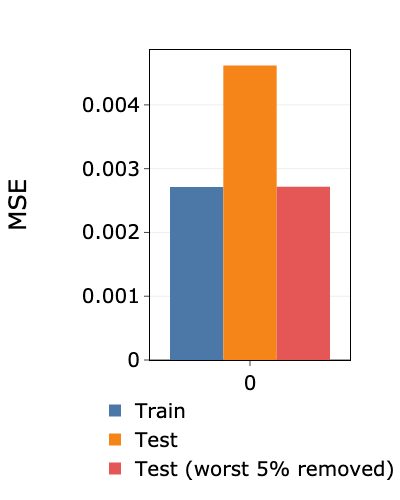

In [18]:
fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)


In [19]:
def get_mse(date, change, period):
    mse_train = []
    mse_test = []
    for i in range(6):
        with open(f"../model_data/{date}/gbt-{change}-{period}-{i}/model.pkl", 'rb') as f:
            model = pickle.load(f)
        
        with open(f"../model_data/{date}/gbt-{change}-{period}-{i}/X_train.pkl", 'rb') as f:
            X_train = pickle.load(f)
        with open(f"../model_data/{date}/gbt-{change}-{period}-{i}/y_train.pkl", 'rb') as f:
            y_train = pickle.load(f)
        y_hat = model.predict(X_train)
        mse_train.append((y_train -  y_hat ) ** 2)
        # mse_train.append(mean_squared_error(y_train, y_hat))

        with open(f"../model_data/{date}/gbt-{change}-{period}-{i}/X_test.pkl", 'rb') as f:
            X_test = pickle.load(f)

        with open(f"../model_data/{date}/gbt-{change}-{period}-{i}/y_test.pkl", 'rb') as f:
            y_test = pickle.load(f)
        y_hat = model.predict(X_test)
        mse_test.append((y_test - y_hat) ** 2)
        # mse_test.append(mean_squared_error(y_test, y_hat))
    
    return mse_train, mse_test

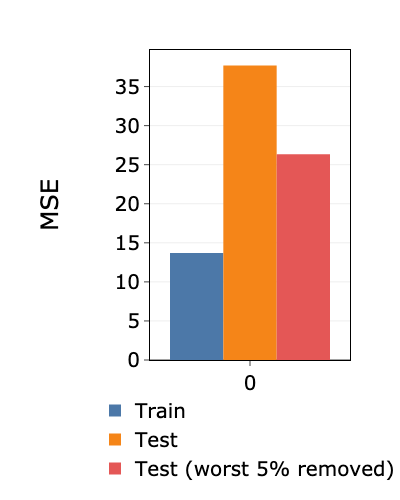

In [25]:
mse_train, mse_test = get_mse(date, 'afrr', 'before')

fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)

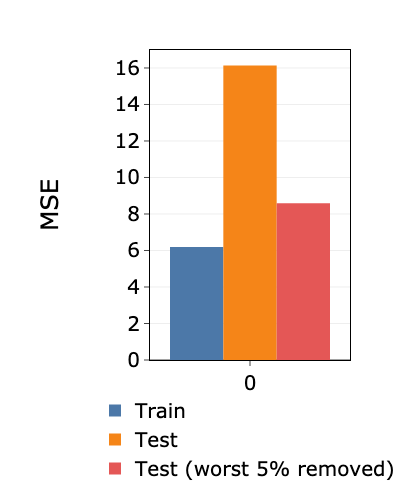

In [26]:
mse_train, mse_test = get_mse(date, 'afrr', 'after')

fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)

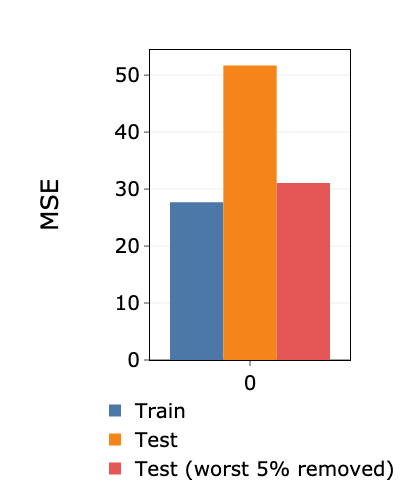

In [27]:
mse_train, mse_test = get_mse(date, 'bzs', 'before')

fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)

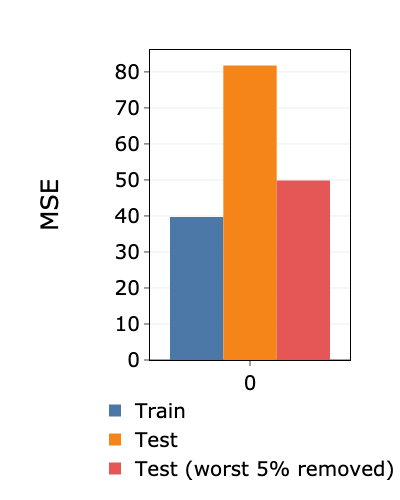

In [28]:
mse_train, mse_test = get_mse(date, 'bzs', 'after')

fig = go.Figure()
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_train[i]) for i in range(6)])], name='Train'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i]) for i in range(6)])], name='Test'))
fig.add_trace(go.Bar(y=[np.mean([np.mean(mse_test[i][np.argsort(mse_test[i], axis=0)][:- int(mse_test[i].shape[0]*0.05)]) for i in range(6)])], name='Test (worst 5% removed)'))
fig.update_yaxes(title_text='MSE').update_layout(height=500, width=400)